In [75]:
import requests
import pandas as pd
import matplotlib
import matplotlib.dates as mdates
from matplotlib import pyplot as plt

In [41]:
%matplotlib inline

In [42]:
matplotlib.rcParams["font.size"]=18
pd.set_option("display.max_columns", None)

In [10]:
df = pandas.read_csv('Streets_Refuse_and_Recycling_Data.csv')
df['date_applicable']= pd.to_datetime(df['date_applicable'])
df['day'] = df['date_applicable'].dt.day
df['month'] = df['date_applicable'].dt.month
df['year'] = df['date_applicable'].dt.year
df

,date_applicable,total_tonnage,recycling_tonnage,refuse_tonnage,OBJECTID,day,month,year
0,2019-03-25,170.18,71.81,170.18,0,25,3,2019
1,2019-03-26,160.85,70.18,160.85,1,26,3,2019
2,2019-03-27,178.44,73.92,178.44,2,27,3,2019
3,2019-03-28,150.39,69.73,150.39,3,28,3,2019
4,2019-03-29,147.80,57.72,147.80,4,29,3,2019
...,...,...,...,...,...,...,...,...
335,2020-08-17,210.89,71.88,210.89,335,17,8,2020
336,2020-08-18,187.20,60.46,187.20,336,18,8,2020
337,2020-08-19,227.31,65.60,227.31,337,19,8,2020
338,2020-08-20,183.48,77.22,183.48,338,20,8,2020


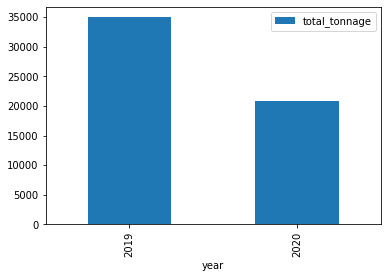

In [25]:
df.groupby('year').sum().reset_index().plot(kind='bar', x ='year',y='total_tonnage')

(array([0, 1]), <a list of 2 Text xticklabel objects>)

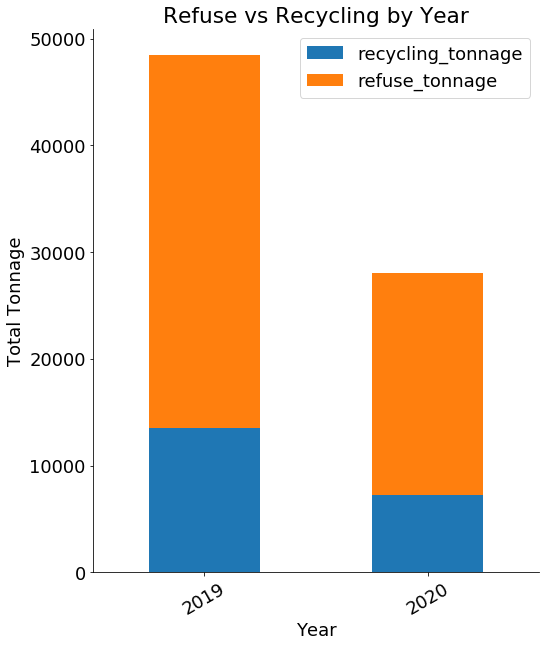

In [129]:
fig, ax = plt.subplots(figsize=(8,10))

df_year = df[['year','recycling_tonnage','refuse_tonnage']].groupby('year').sum()
df_year.plot.bar(ax=ax, stacked=True)
ax.set_ylabel('Total Tonnage')
ax.set_xlabel('Year')
ax.set_title('Refuse vs Recycling by Year')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xticks(rotation=30)

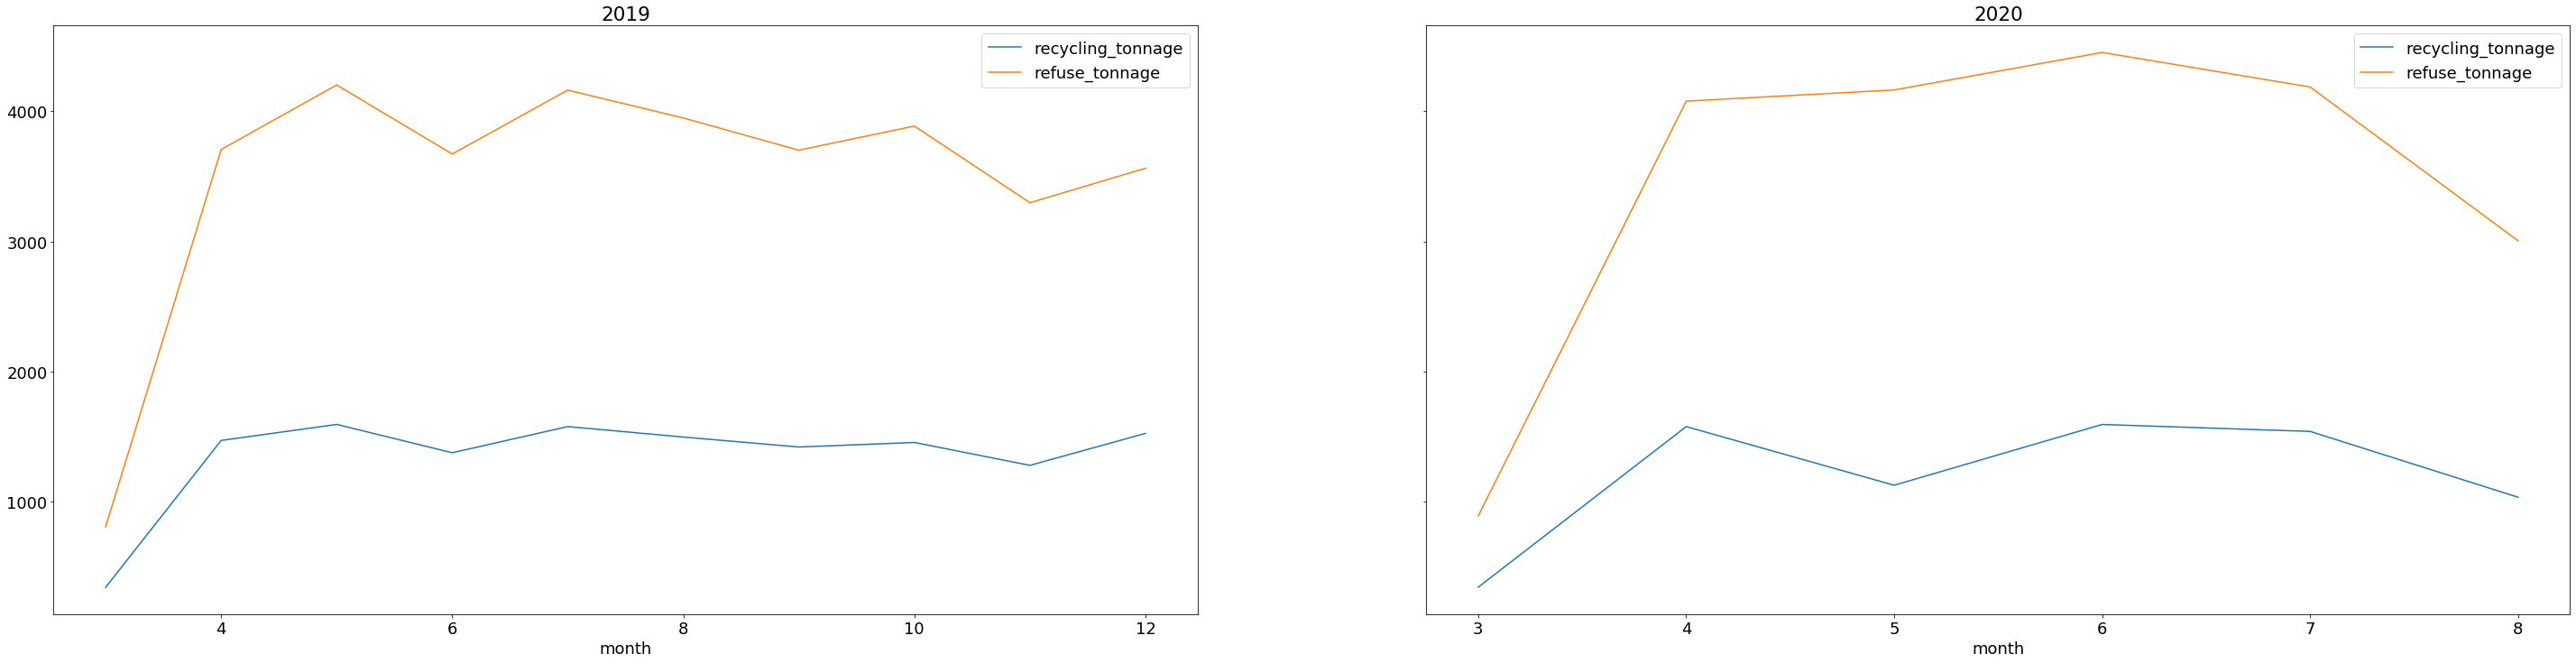

In [104]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(50,12), sharey=True)
ax_list = list(ax)

df_2019 = df[df['year']==2019]
df_2019_month = df_2019.groupby('month').sum().reset_index()
df_2019_month[['month','recycling_tonnage','refuse_tonnage']].plot.line(x='month',ax=ax_list[0], title = '2019')



df_2020 = df[df['year']==2020]
df_2020_month = df_2020.groupby('month').sum().reset_index()
df_2020_month[['month','recycling_tonnage','refuse_tonnage']].plot.line(x='month',ax=ax_list[1],  title = '2020')

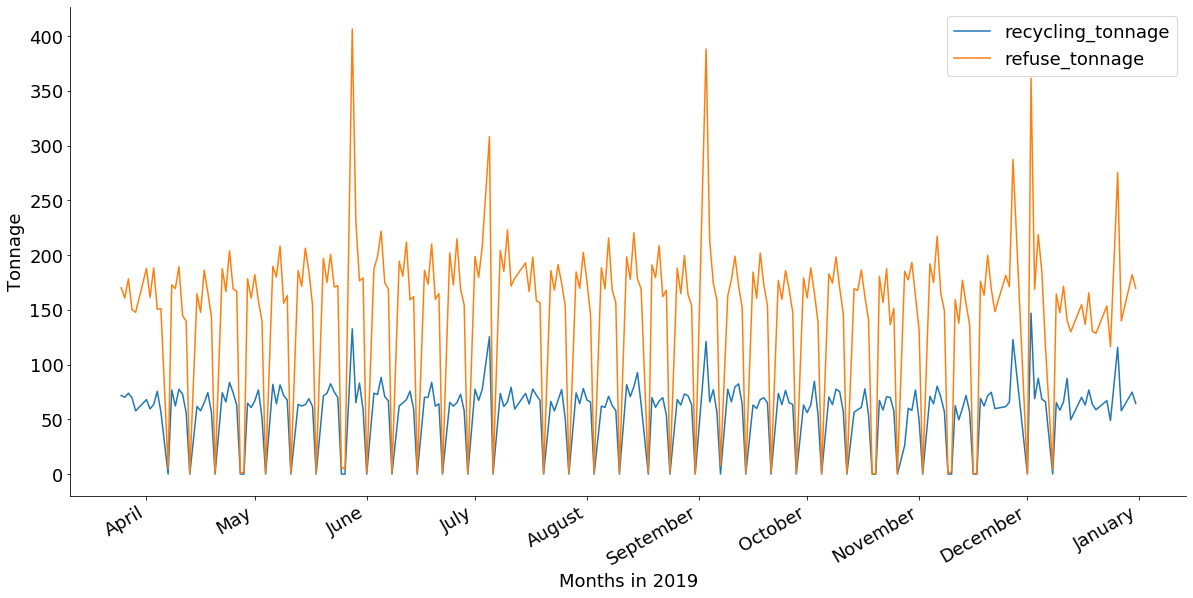

In [94]:
fig, ax = plt.subplots(figsize=(20,10))

df_2019 = df[df['year']==2019]
df_2019[['date_applicable','recycling_tonnage','refuse_tonnage']].plot.line(x='date_applicable', ax=ax)
monthyearFmt = mdates.DateFormatter('%B')
ax.xaxis.set_major_formatter(monthyearFmt)
ax.set_xlabel('Months in 2019')
ax.set_ylabel('Tonnage')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

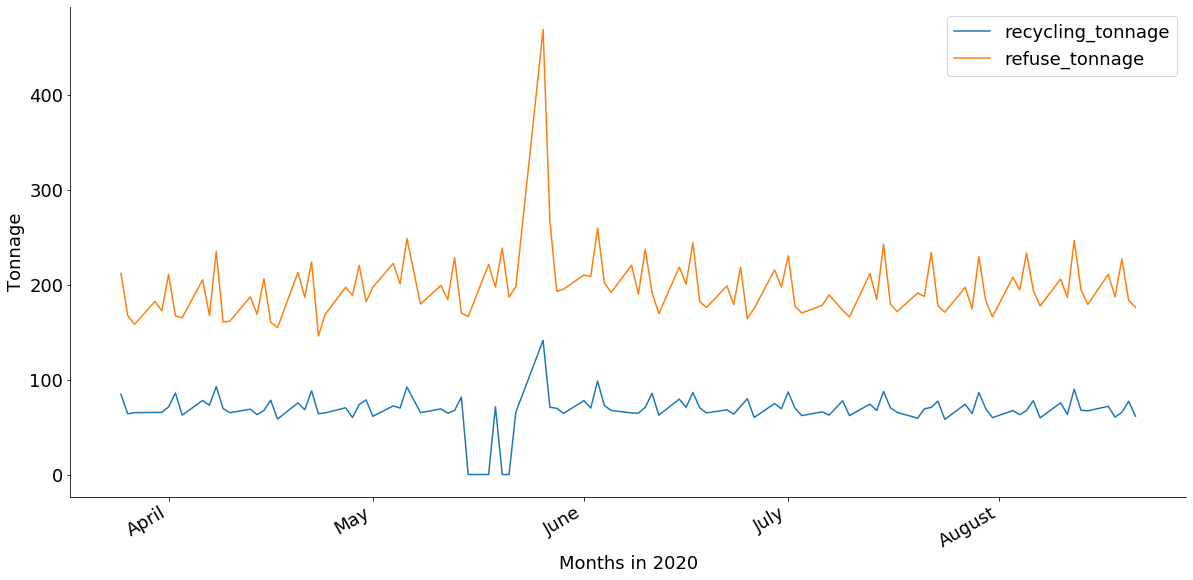

In [105]:
fig, ax = plt.subplots(figsize=(20,10))

df_2020 = df[df['year']==2020]
df_2020[['date_applicable','recycling_tonnage','refuse_tonnage']].plot.line(x='date_applicable', ax=ax)
monthyearFmt = mdates.DateFormatter('%B')
ax.xaxis.set_major_formatter(monthyearFmt)
ax.set_xlabel('Months in 2020')
ax.set_ylabel('Tonnage')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

In [127]:
df_2019.sort_values(by='refuse_tonnage',ascending=False).head(10)

,date_applicable,total_tonnage,recycling_tonnage,refuse_tonnage,OBJECTID,day,month,year
55,2019-05-28,406.68,132.71,406.68,55,28,5,2019
136,2019-09-03,388.32,121.16,388.32,136,3,9,2019
213,2019-12-02,361.70,147.01,361.70,213,2,12,2019
87,2019-07-05,308.23,125.54,308.23,87,5,7,2019
211,2019-11-27,287.56,123.00,287.56,211,27,11,2019
231,2019-12-26,275.45,115.78,275.45,231,26,12,2019
56,2019-05-29,230.56,65.25,230.56,56,29,5,2019
91,2019-07-10,223.10,65.85,223.10,91,10,7,2019
62,2019-06-05,221.97,88.38,221.97,62,5,6,2019
120,2019-08-14,220.47,79.85,220.47,120,14,8,2019


In [130]:
df_2020.sort_values(by='refuse_tonnage',ascending=False).head(10)

,date_applicable,total_tonnage,recycling_tonnage,refuse_tonnage,OBJECTID,day,month,year
277,2020-05-26,469.07,141.37,469.07,277,26,5,2020
278,2020-05-27,266.97,70.86,266.97,278,27,5,2020
283,2020-06-03,259.79,98.52,259.79,283,3,6,2020
265,2020-05-06,248.64,92.23,248.64,265,6,5,2020
332,2020-08-12,246.67,89.85,246.67,332,12,8,2020
293,2020-06-17,244.37,86.55,244.37,293,17,6,2020
312,2020-07-15,242.71,87.54,242.71,312,15,7,2020
274,2020-05-20,238.64,0.00,238.64,274,20,5,2020
288,2020-06-10,237.41,70.75,237.41,288,10,6,2020
245,2020-04-08,235.14,92.70,235.14,245,8,4,2020
